# Coursework A

In [1]:
import numpy as np  #import the numpy library as np
import matplotlib.pyplot as plt #import the pyplot library as plt
import matplotlib.style #Some style nonsense
import matplotlib as mpl #Some more style nonsense

#Set default figure size
#mpl.rcParams['figure.figsize'] = [12.0, 8.0] #Inches... of course it is inches
mpl.rcParams["legend.frameon"] = False
mpl.rcParams['figure.dpi']=200 # dots per inch


In [2]:
def polyModelWithNoise(x,theta,sigma):
    
    # input:
    # x - numpy array of x values
    # theta - parameters of the polynomial
    # sigma - standard deviation for Gaussian noise
    
    #output:
    # y - numpy array of polynomial with noise
    
    y=np.zeros(x.shape)  # storage for y
    
    for i in range(len(theta)):
        y+=theta[i]* (x**i)

    noise = sigma*np.random.randn(len(x)) # array of Normal distribution with standard deviation and mean of 0 
    
    return y+noise
    

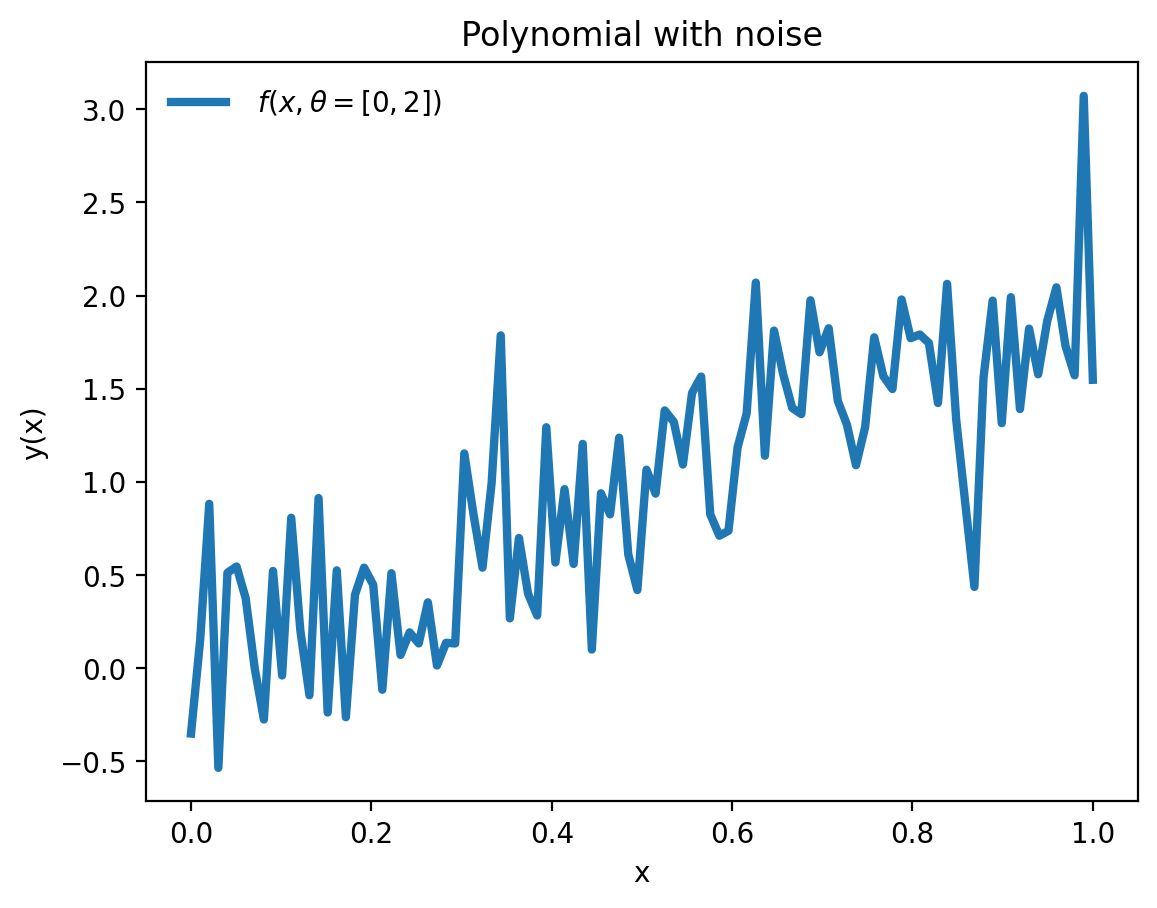

In [3]:
# plot the polynomial function with noise

x=np.linspace(0,1,100)
theta = np.array([0,2])
sigma = 0.5

y = polyModelWithNoise (x,theta,sigma)
fig, ax = plt.subplots()  
ax.plot(x,y,linewidth=3,label=r" $f(x, \theta=[0,2])$")

ax.set_title('Polynomial with noise')
ax.set_xlabel("x")
ax.set_ylabel("y(x)")
ax.legend()



In [4]:
# Previous fail attempt to define gradient 

#def polyGradient(x,theta):
    
#    grad = np.zeros ( len(theta) )
    
#    for i in range(len(theta)):
#        grad[i] = x**i    # updating the gradient with respect to each theta with analytical form of the gradient  
    
    #return grad

In [5]:
def polyGradient(x,theta):
    
    return np.array([x**0, x**1])

### Defining the function to be used for Stochastic Gradient Descent

In [6]:
# Defining the random number generator: return array of value between 0 and 1 with normal distribution
def samples(nsamples):
    # input: nsamples - a number presenting the batch/sample size 
    # output: random number - an array of number randomly generated by a normal distribution between 0,1
    return (np.random.uniform(0,1,nsamples))

# Defining the Chi-square function
def get_avg_chisq(x, theta_model,theta_data,sigma_model,sigma_data):
    # inputs: x - array of x values
    #         theta_model - polynomial model theta parameters
    #         theta_data - polynomial data theta parameters
    #         sigma_model - polynomial model sigma parameter
    #         sigma_data - polynomial data sigma parameter
    
    # output: average of the difference between model and data - a number represent the chi-squared

    return np.average((polyModelWithNoise(x,theta_model,sigma_model)-polyModelWithNoise(x,theta_data,sigma_data))**2)



### Task 1. to 3.

In [7]:
# generate a sample of 10 random x values from a uniform distribution between 0 and 1
x=samples(100)

# generate 10 y data values (True distribution)
true_y = polyModelWithNoise(x,[0,2],0.5)   # 1D array of 10 y data values with truth parameters

# generate 10 y model values
model_y = polyModelWithNoise(x, [-1,0.5], 0) #note setting sigma=0 ensure no noise



### Task 4. Stochastic Gradient Descent

In [8]:
numSteps=100
theta_model = [-1,0.5] # starting value for model theta parameter as given in the problem
theta_data = [0,2]     # the data's theta parameter
sigma_model = 0        # model's sigma
sigma_data = 0.5       # data's sigma
eta = 0.5              # learning rate 
chiSqArray = np.zeros(numSteps)          # for chi-squared plot 
thetaArray = np.zeros( (numSteps+1 , 2)) # storage for theta after each update
thetaArray[0] = theta_model              # starting step




for i in range(numSteps): # loop 100 times
    #note a sample of 10 random x value has been generated before
    
    chiSq=get_avg_chisq(x,theta_model,theta_data,sigma_model,sigma_data) #the average Chi_square on ith updated theta
    chiSqArray[i]=chiSq
    
    # deviation = difference between model and true/data value
    deviation = polyModelWithNoise(x, theta_model, sigma_model) - polyModelWithNoise(x,theta_data,sigma_data)
    
    # Update Scheme
    theta_model-=eta*np.average(deviation[None,:]*polyGradient(x,theta_model),axis=1)
    thetaArray[i+1]=theta_model 


### Chi-Square minimisation Plot

Text(0, 0.5, ' $\\chi^2$')

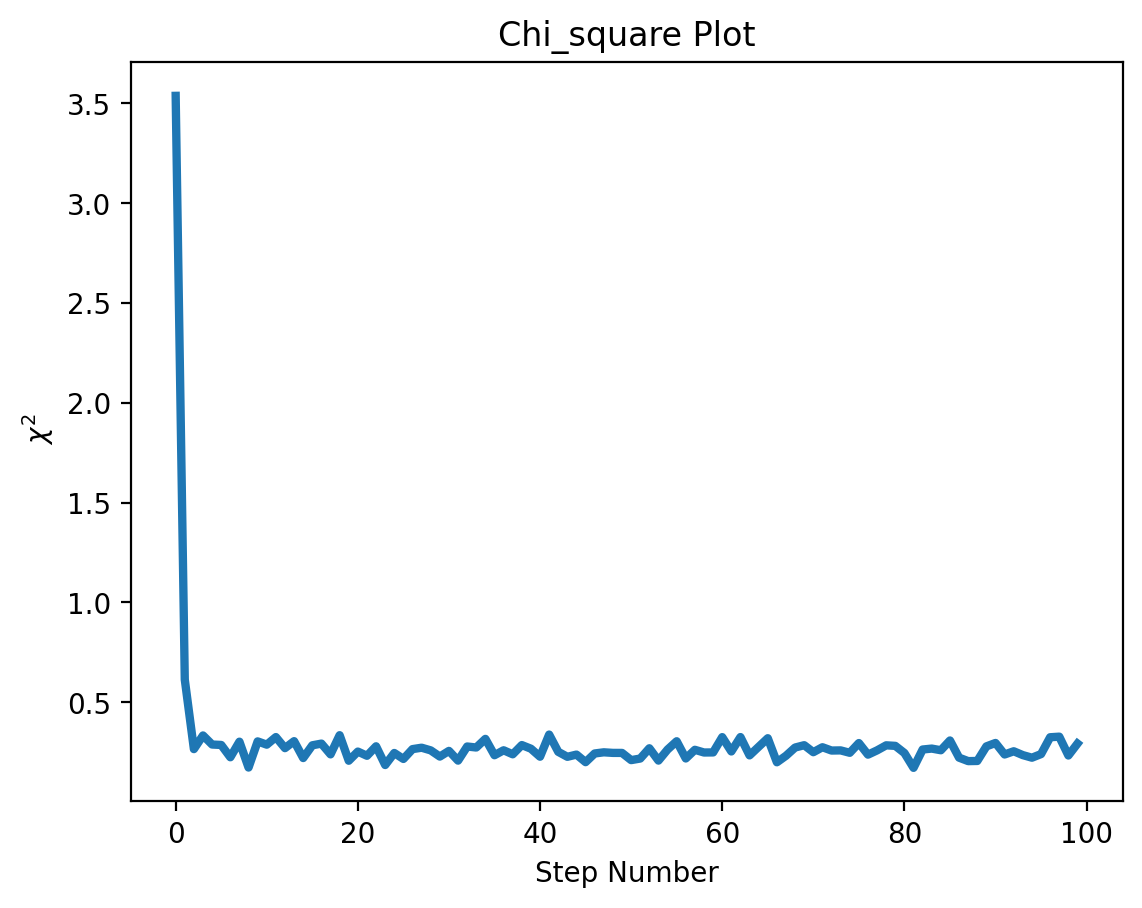

In [9]:
# plot of step number vs chi-squared
fig, ax = plt.subplots()  #I like to make plots using this silly fig,ax method but plot how you like
count=np.arange(numSteps+1)  #The integers from 0 up to num steps
ax.plot(count[:-1],chiSqArray,linewidth=3)
ax.set_title('Chi_square Plot')
ax.set_xlabel("Step Number")
ax.set_ylabel(r" $\chi^2$")

### Chi-square graph
The Chi-square graph above shows the deviation of our model to the data across the 100 steps where each step we are applying the gradient descent algorithm.

## Third Order Polynomial

In [10]:
#Third Order Polynomial data
theta_data = np.array([0,2,2,2])
sigma_data = 0.5



In [11]:
# Defining the gradient for each order polynomial

def first_order_grad (x,theta):
    return np.array([x**0,x**1])

def third_order_grad (x,theta):
    return np.array([x**0,x**1,x**2,x**3])

def seventh_order_grad (x,theta):
    return np.array([x**0,x**1,x**2,x**3,x**4,x**5,x**6,x**7])
        

## 1st Order Polynomial: Best of Fit

In [12]:
numSteps=100

## note theta and sigma for the data is defined above already

first_theta_model = np.array([-1,0.5]) # choosing the starting theta parameter to be [-1,0.5]
first_sigma_model = 0   # no noise

eta = 0.5 #learning rate
first_chiSqArray = np.zeros(numSteps)          # for chi-squared plot 
first_thetaArray = np.zeros((numSteps+1,2))    # 2D array because 1 order polynomial
first_thetaArray[0] = first_theta_model        # starting step

for i in range(numSteps): # loop 100 times
    #note a sample of 10 random x value has been generated before
    first_chiSq=get_avg_chisq(x,first_theta_model,theta_data,first_sigma_model,sigma_data)
    first_chiSqArray[i]=first_chiSq
    
    # deviation = difference between model and true value
    deviation = polyModelWithNoise(x, first_theta_model, first_sigma_model) - polyModelWithNoise(x,theta_data,sigma_data)
    
    # Update Scheme
    first_theta_model-=eta*np.average(deviation[None,:]*first_order_grad(x,first_theta_model))
    first_thetaArray[i+1]=first_theta_model 


Text(0, 0.5, ' $\\chi^2$')

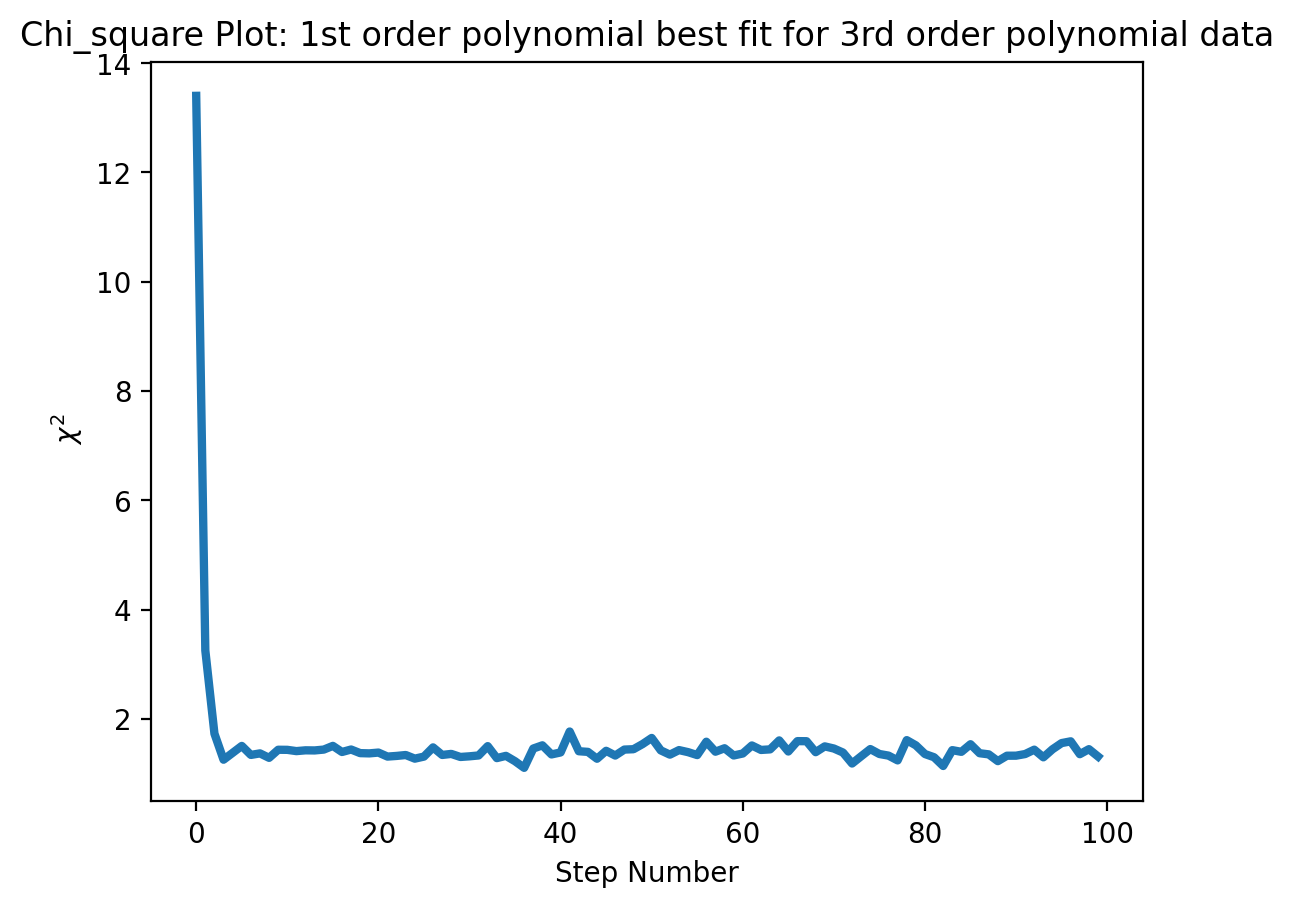

In [13]:
# plot of step number vs chi-squared
fig, ax = plt.subplots()  #I like to make plots using this silly fig,ax method but plot how you like
count=np.arange(numSteps+1)  #The integers from 0 up to num steps
ax.plot(count[:-1],first_chiSqArray,linewidth=3)
ax.set_title('Chi_square Plot: 1st order polynomial best fit for 3rd order polynomial data')
ax.set_xlabel("Step Number")
ax.set_ylabel(r" $\chi^2$")


### Third order polynomial best of fit

In [14]:
numSteps=100

## note theta and sigma for the model is defined above already

third_theta_model = np.array([-1,0.5,1.5,2.5]) # choosing the starting theta parameter to be [-1,0.5,1.5,2.5]
third_sigma_model = 0   # no noise

eta = 0.5
third_chiSqArray = np.zeros(numSteps)          # for chi-squared plot 
third_thetaArray = np.zeros((numSteps+1,4))        # 4D array because 3 order polynomial
third_thetaArray[0] = third_theta_model # starting step

for i in range(numSteps): # loop 100 times
    #note a sample of 10 random x value has been generated before
    third_chiSq=get_avg_chisq(x,third_theta_model,theta_data,third_sigma_model,sigma_data)
    third_chiSqArray[i]=third_chiSq
    
    # deviation = difference between model and true value
    deviation = polyModelWithNoise(x, third_theta_model, third_sigma_model) - polyModelWithNoise(x,theta_data,sigma_data)
    
    # Update Scheme
    third_theta_model-=eta*np.average(deviation[None,:]*third_order_grad(x,third_theta_model))
    third_thetaArray[i+1]=third_theta_model 



Text(0, 0.5, ' $\\chi^2$')

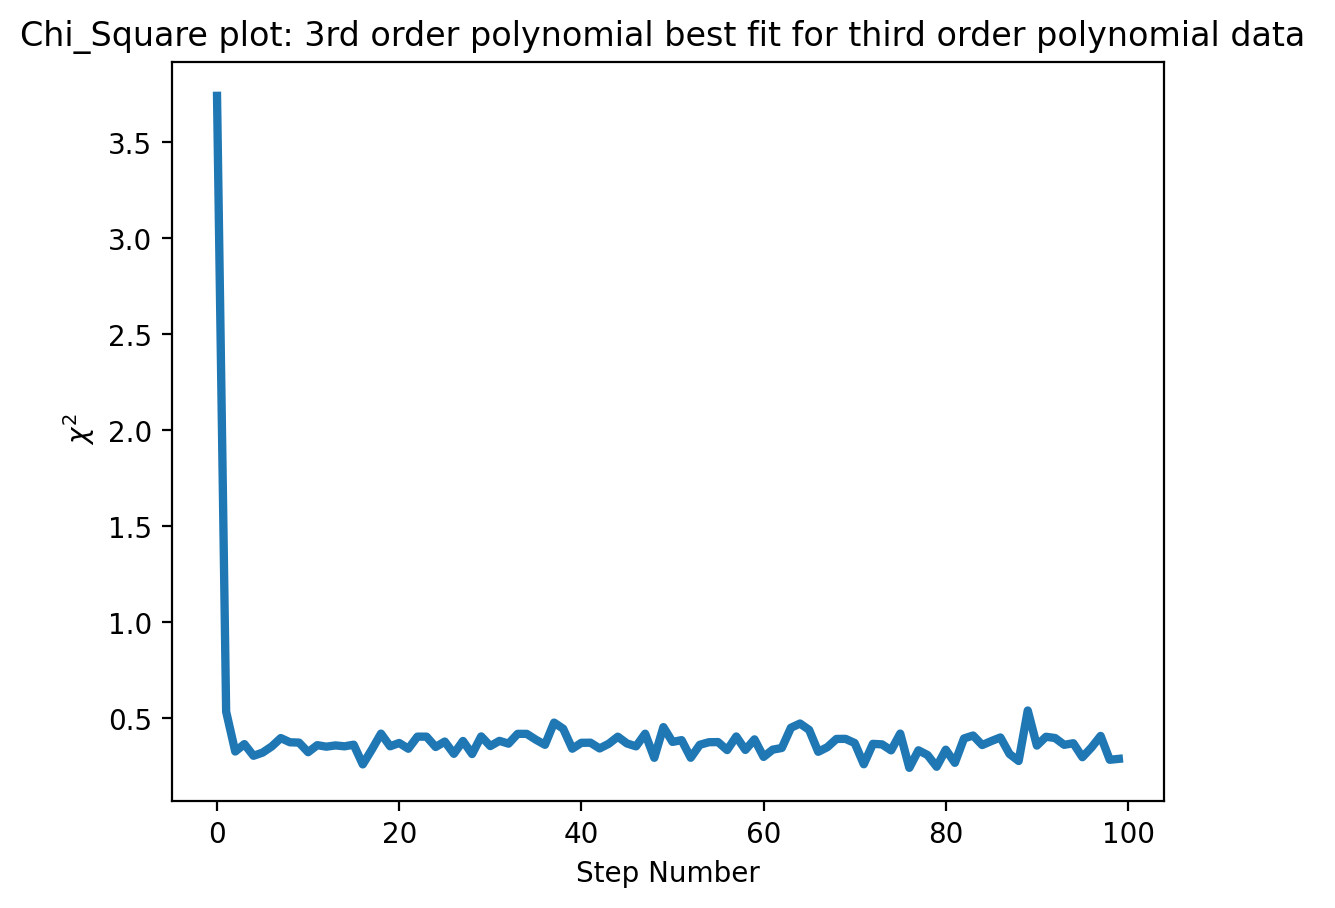

In [15]:
# plot of step number vs chi-squared
fig, ax = plt.subplots()  #I like to make plots using this silly fig,ax method but plot how you like
count=np.arange(numSteps+1)  #The integers from 0 up to num steps
ax.plot(count[:-1],third_chiSqArray,linewidth=3)
ax.set_title('Chi_Square plot: 3rd order polynomial best fit for third order polynomial data ')
ax.set_xlabel("Step Number")
ax.set_ylabel(r" $\chi^2$")

### Seventh order Polynomial best fit

In [16]:
numSteps=100

## note theta and sigma for the model is defined above already

seventh_theta_model = np.array([0,1,2,1.2,1.5,1.7,2.1,2.2]) # choosing the starting theta parameter to be [-1,0.5,1.5,2.5]
seventh_sigma_model = 0   # no noise

eta = 0.5
seventh_chiSqArray = np.zeros(numSteps)          # for chi-squared plot 
seventh_thetaArray = np.zeros((numSteps+1,8))        # 8D array because 7th order polynomial
seventh_thetaArray[0] = seventh_theta_model # starting step

for i in range(numSteps): # loop 100 times
    #note a sample of 10 random x value has been generated before
    seventh_chiSq=get_avg_chisq(x,seventh_theta_model,theta_data,seventh_sigma_model,sigma_data)
    seventh_chiSqArray[i]=seventh_chiSq
    
    # deviation = difference between model and true value
    deviation = polyModelWithNoise(x, seventh_theta_model, seventh_sigma_model) - polyModelWithNoise(x,theta_data,sigma_data)
    
    # Update Scheme
    seventh_theta_model-=eta*np.average(deviation[None,:]*seventh_order_grad(x,seventh_theta_model))
    seventh_thetaArray[i+1]= seventh_theta_model 



Text(0, 0.5, ' $\\chi^2$')

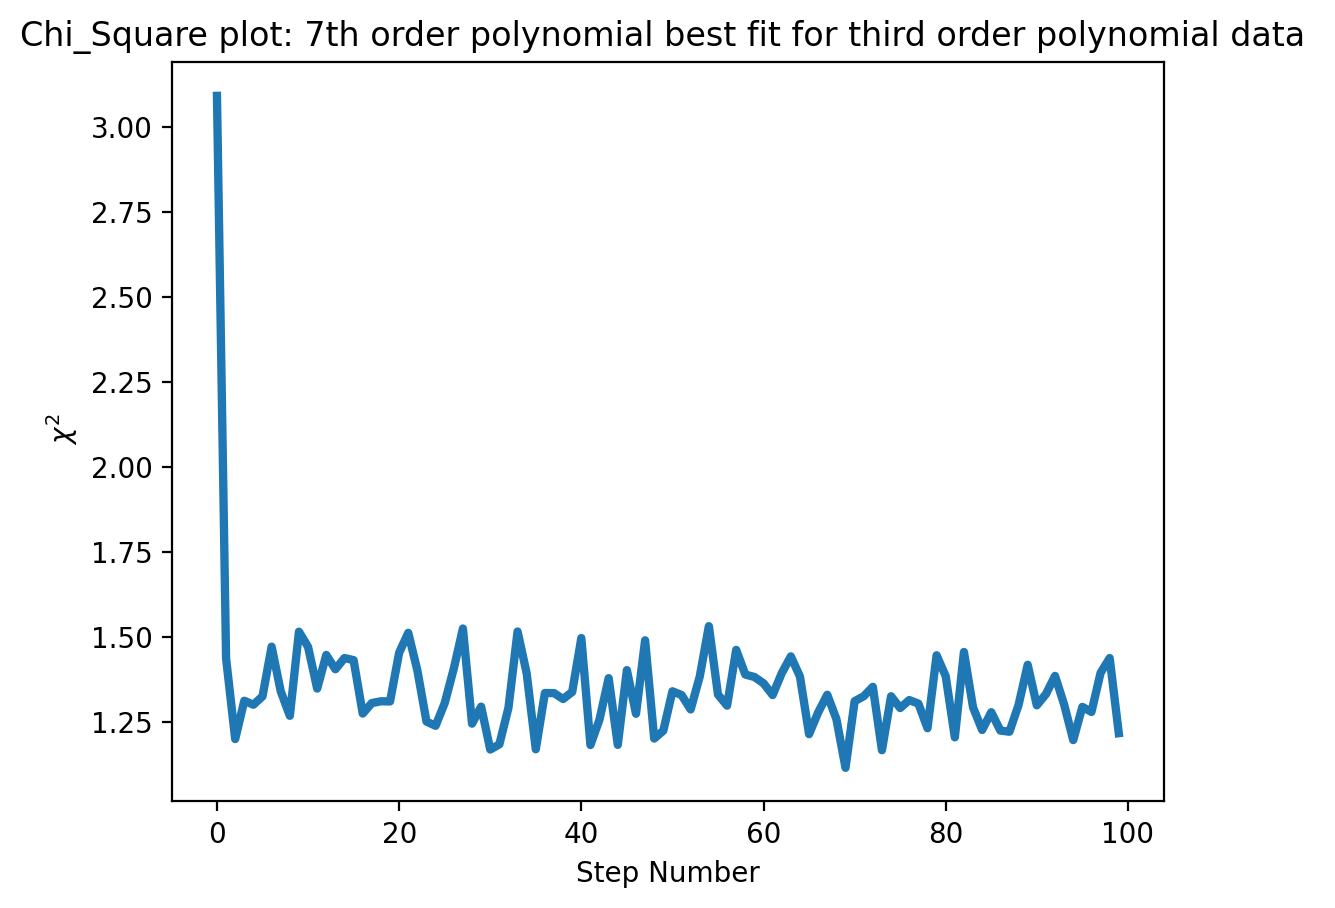

In [17]:
# plot of step number vs chi-squared
fig, ax = plt.subplots()  #I like to make plots using this silly fig,ax method but plot how you like
count=np.arange(numSteps+1)  #The integers from 0 up to num steps
ax.plot(count[:-1],seventh_chiSqArray,linewidth=3)
ax.set_title('Chi_Square plot: 7th order polynomial best fit for third order polynomial data ')
ax.set_xlabel("Step Number")
ax.set_ylabel(r" $\chi^2$")


### Plot of third order polynomial data over an expanded x-range of -0.5,1.5

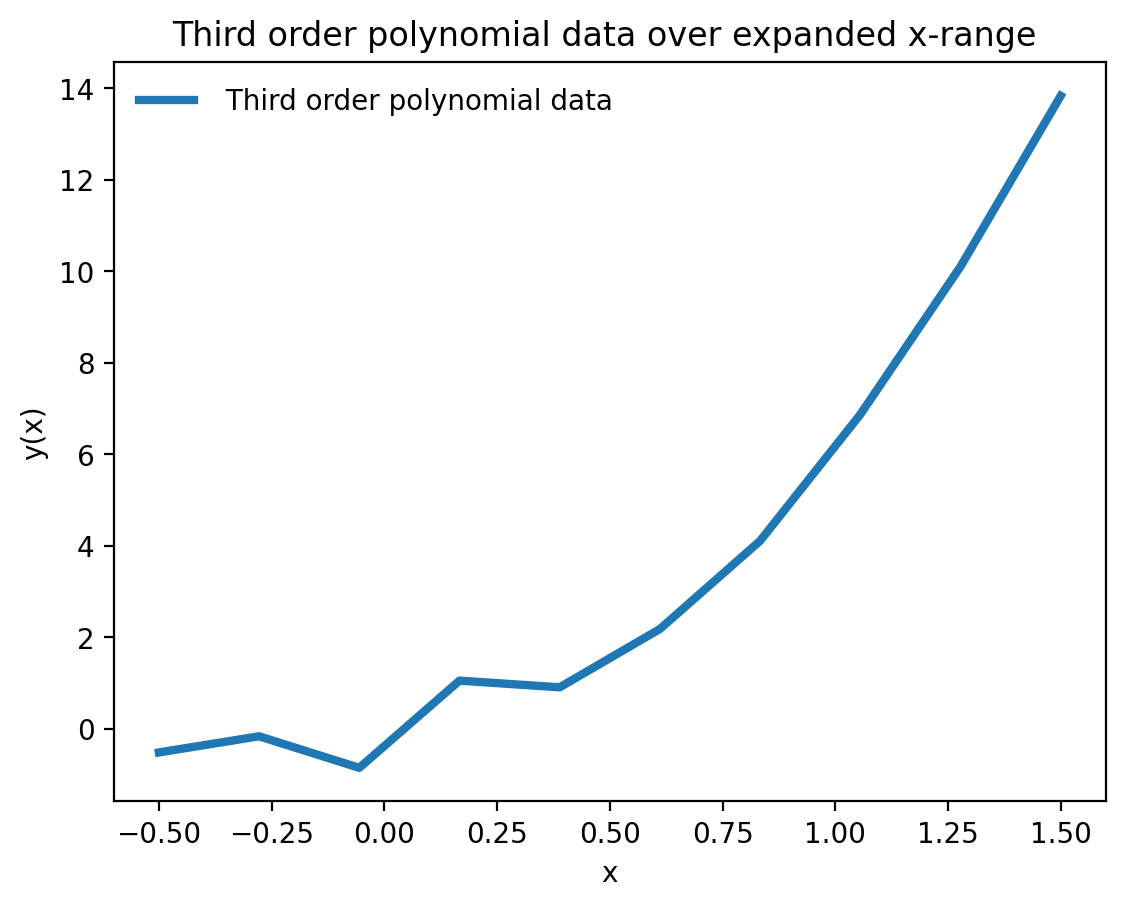

In [18]:
x=np.linspace(-0.5,1.5,10)
third_order_data = polyModelWithNoise(x,theta_data,sigma_data)

fig1, ax = plt.subplots()  
ax.plot(x,third_order_data,linewidth=3,label=r" Third order polynomial data")

ax.set_title('Third order polynomial data over expanded x-range ')
ax.set_xlabel("x")
ax.set_ylabel("y(x)")
ax.legend()


### First order polynomial model best fit over expanded x-range

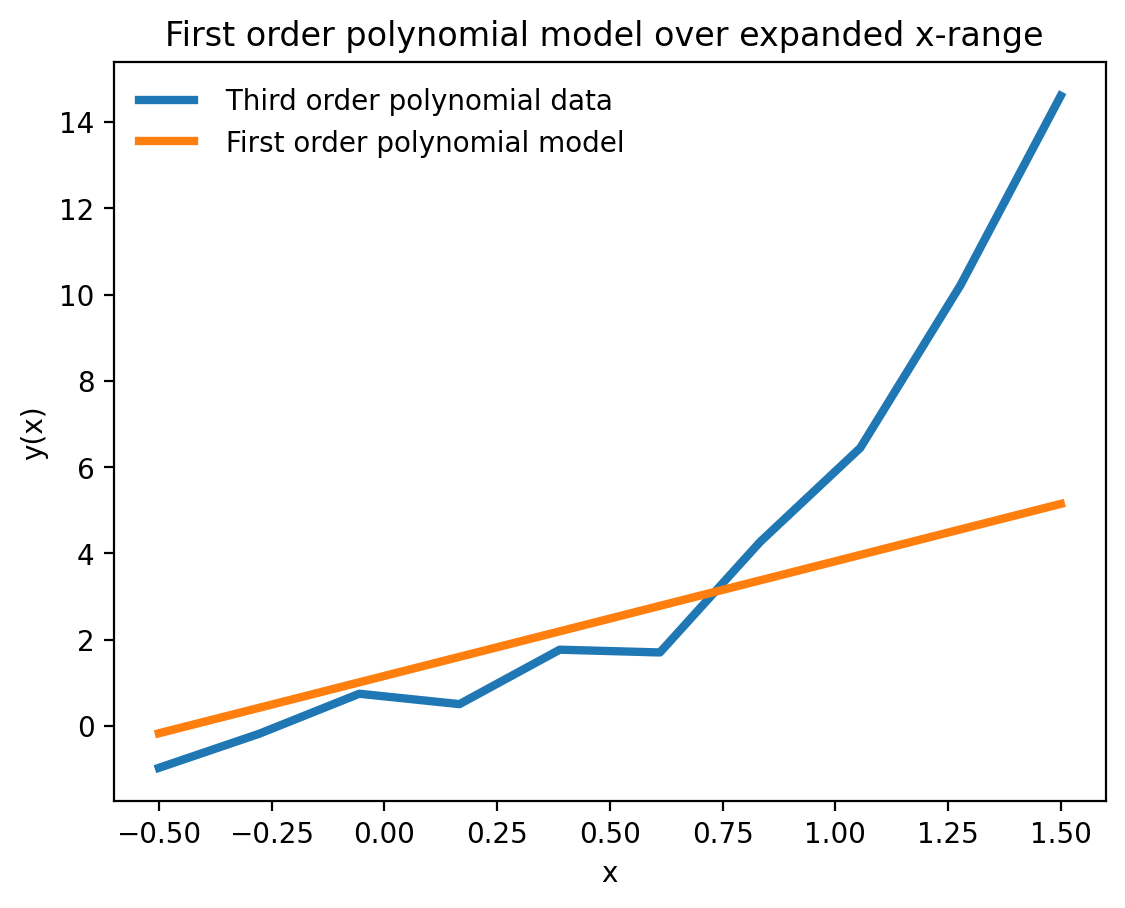

In [19]:
# Taking the 100th optimised first order polynomial theta parameter
first_order_theta=first_thetaArray[-1]

# plot and compare to the third order polynomial data over expanded x-range (non-trained region)
# note 10 linearly spaced x values between (-0.5,1.5) has been generated before
third_order_data = polyModelWithNoise(x,theta_data,sigma_data)
first_order_model = polyModelWithNoise(x,first_order_theta,0) #no noise 

fig1, ax = plt.subplots()  
ax.plot(x,third_order_data,linewidth=3,label=r" Third order polynomial data")
ax.plot(x,first_order_model,linewidth=3,label=r" First order polynomial model")


ax.set_title('First order polynomial model over expanded x-range ')
ax.set_xlabel("x")
ax.set_ylabel("y(x)")

ax.legend()

### Third order polynomial model best fit over expanded x-range

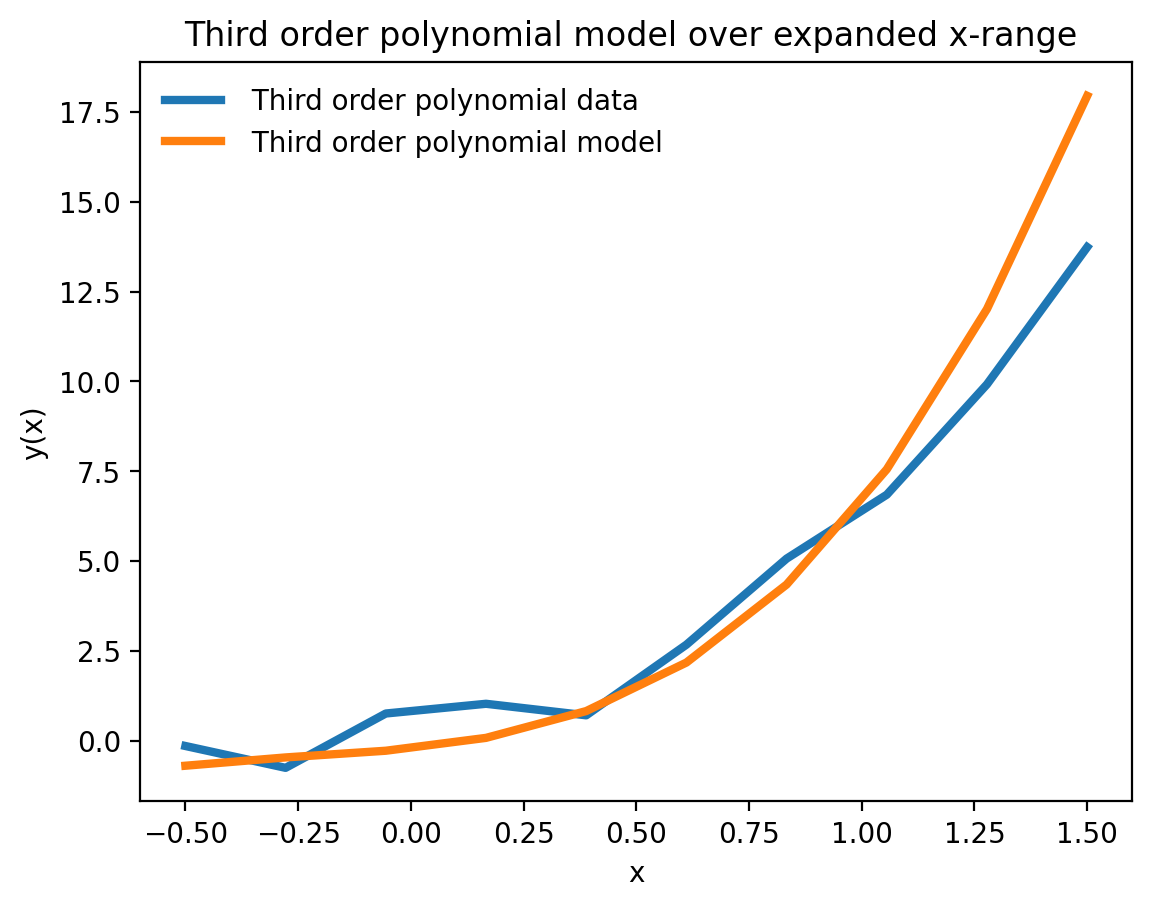

In [20]:
# Taking the 100th optimised third order polynomial theta parameter
third_order_theta=third_thetaArray[-1]

# plot and compare to the third order polynomial data over expanded x-range (non-trained region)
# note 10 linearly spaced x values between (-0.5,1.5) has been generated before
third_order_data = polyModelWithNoise(x,theta_data,sigma_data)
third_order_model = polyModelWithNoise(x,third_order_theta,0) #no noise 

fig1, ax = plt.subplots()  
ax.plot(x,third_order_data,linewidth=3,label=r" Third order polynomial data")
ax.plot(x,third_order_model,linewidth=3,label=r" Third order polynomial model")


ax.set_title('Third order polynomial model over expanded x-range ')
ax.set_xlabel("x")
ax.set_ylabel("y(x)")
ax.legend()

### Seventh order polynomial model best fit over expanded x-range

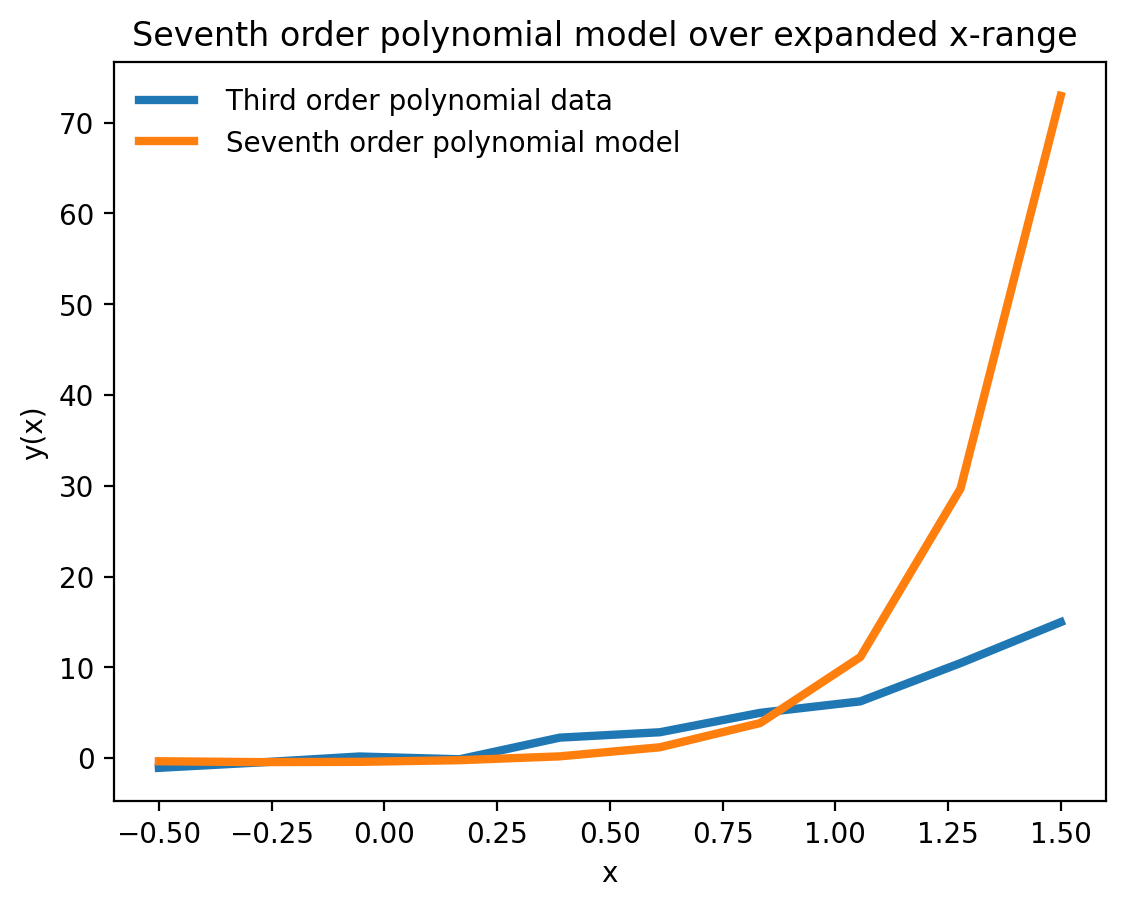

In [21]:
# Taking the 100th optimised seventh order polynomial theta parameter
seventh_order_theta=seventh_thetaArray[-1]

# plot and compare to the third order polynomial data over expanded x-range (non-trained region)
# note 10 linearly spaced x values between (-0.5,1.5) has been generated before
third_order_data = polyModelWithNoise(x,theta_data,sigma_data)
seventh_order_model = polyModelWithNoise(x,seventh_order_theta,0) #no noise 

fig1, ax = plt.subplots()  
ax.plot(x,third_order_data,linewidth=3,label=r" Third order polynomial data")
ax.plot(x,seventh_order_model,linewidth=3,label=r" Seventh order polynomial model")


ax.set_title('Seventh order polynomial model over expanded x-range ')
ax.set_xlabel("x")
ax.set_ylabel("y(x)")
ax.legend()

### Comment on how well the models generalise to the regions of x over which they were not trained

The third order polynomial model perform the best in the expanded x-range then it is the first order polynomial model. The Seventh order polynomial model perform the worst in the expanded x-range. But in region -0.5<x<0, all three model perform pretty well generalising to the regions of x over which they were not trained.

In region  -1<x<1, the model perform relatively better than in region |x|>1 because for small value of x the error is relatively small which is very obvious for the seventh order polynomial model (the error increases rapidly in region x>1). This is due to the higher order term essentially vanish for small value of x. However, the higher order term will rapidly increase the error for large value of x.
